In [2]:
from fuzzynumber import *
import dbpso

In [3]:
def minimizingFunction(space, c=3, d=500, r=0.8, c3=300, h=1.5, a=100, b=1.22):
    T = space[0]
    return (c*d/r) + (c3/T) + (h*d*T*(a*r+(b*r-1)*d))/(2*(a+b*d)*r)

def minimizingFunctionForm2(space, c=3, d=500, r=0.8, c3=300, h=1.5, a=100, b=1.22):
    t1 = space[0]
    T = space[1]
    k = a+b*d
    ans = (c*k*t1 + c3 + h*(0.5*(r*k-d)*t1**2 + d*T*(T-t1) + 0.5*d*(t1**2-T**2)))/T
    return ans

In [4]:
solution = dbpso.DBPSO(minimizingFunction, Maxgen=100, N = 100, dim = 1, minx = [0.2], maxx = [2])
sol = solution.solve()
T = sol[0][0]
Z = sol[1]
k = 100 + 1.22*500
t1 = T*500/(0.8*k)
Q = 500*(T-t1)
print("Minimizing in T\nt1 = %f | T = %f | k = %f | Q = %f | Z = %f" %(t1, T, k, Q, Z))

Minimizing in T
t1 = 2.276849 | T = 2.586501 | k = 710.000000 | Q = 154.825752 | Z = 2107.106133


Fuzzy Demand is  TFN <460.000000, 500.000000, 600.000000>
Fuzzy t1 is  TFN <1.948026, 2.282757, 2.451237>
Fuzzy Production Rate is  TFN <661.200000, 710.000000, 832.000000>
Fuzzy Inventory Lvl is  TFN <65.308794, 155.227508, 387.111768>
Fuzzy Cost is  TFN <1933.378387, 2107.107256, 2510.407648>


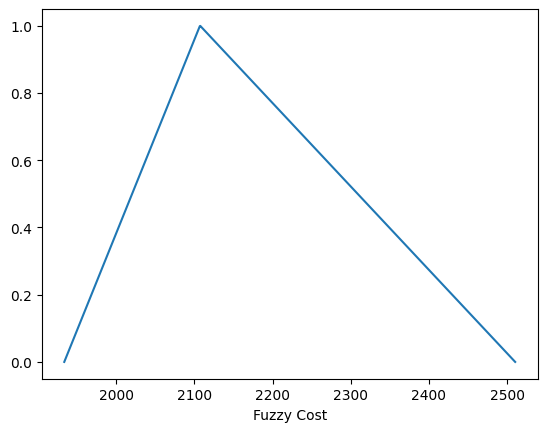

Fuzzy Minimizing in T and defuzzifying
d = 515.000000 | DOF = 0.304348 | t1 = 2.241195 | T = 2.593212 | k = 728.300000 | Q = 190.718895 | Z = 2164.500137


In [5]:
d = TFN(460, 500, 600)
print("Fuzzy Demand is ", d)

def func(space):
    tff = minimizingFunction(space, d=d)
    return tff.yRankingIndex()

solution = dbpso.DBPSO(func, Maxgen=100, N = 100, dim = 1, minx = [0.1], maxx = [3])
sol = solution.solve()
T = sol[0][0]
Z = minimizingFunction([T], d=d)
k = 100 + 1.22*d
t1 = 500*T/(0.8*k)
print("Fuzzy t1 is ", t1)
print("Fuzzy Production Rate is ", k)
Q = d*(T-t1)
print("Fuzzy Inventory Lvl is ", Q)
print("Fuzzy Cost is ", Z)
zplt = Z.plot(xlabel='Fuzzy Cost')
plt.show()
print("Fuzzy Minimizing in T and defuzzifying\nd = %f | DOF = %f | t1 = %f | T = %f | k = %f | Q = %f | Z = %f"
      %(d.yRankingIndex(), d.dof(), t1.yRankingIndex(), T, k.yRankingIndex(), Q.yRankingIndex(), Z.yRankingIndex()))


Intuitionistic Fuzzy Demand is  ITFN <460.000000, 500.000000, 600.000000>; <400.000000, 500.000000, 660.000000>
Int. Fuzzy t1 is  ITFN <1.914681, 2.243683, 2.409278>; <1.759848, 2.243683, 2.709209>
Int. Fuzzy Production Rate is  ITFN <661.200000, 710.000000, 832.000000>; <588.000000, 710.000000, 905.200000>
Int. Fuzzy Inventory Lvl is  ITFN <64.190875, 152.570413, 380.485412>; <-64.154058, 152.570413, 520.723601>
Int. Fuzzy Cost is  ITFN <1933.806487, 2107.129179, 2509.945141>; <1692.037358, 2107.129179, 2764.785959>


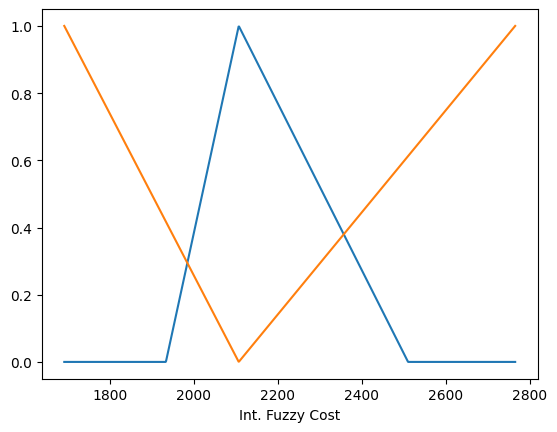

Int. Fuzzy Minimizing in T and defuzzifying
d = 515.000000 | t1 = 2.220968 | T = 2.548823 | k = 728.300000 | Q = 188.940935 | Z = 2166.136458


In [6]:
d = ITFN(460, 400, 500, 600, 660) #itfn of the form (a1, a2, b, c1, c2)
print("Intuitionistic Fuzzy Demand is ", d)
def func(space):
    itff = minimizingFunction(space, d=d)
    return itff.defuzz()

solution = dbpso.DBPSO(func, Maxgen=100, N = 100, dim = 1, minx = [0.1], maxx = [3])
sol = solution.solve()
T = sol[0][0]
Z = minimizingFunction([T], d=d)
k = 100 + 1.22*d
t1 = 500*T/(0.8*k)
print("Int. Fuzzy t1 is ", t1)
print("Int. Fuzzy Production Rate is ", k)
Q = d*(T-t1)
print("Int. Fuzzy Inventory Lvl is ", Q)
print("Int. Fuzzy Cost is ", Z)
zplt = Z.plot(xlabel='Int. Fuzzy Cost')
plt.show()
print("Int. Fuzzy Minimizing in T and defuzzifying\nd = %f | t1 = %f | T = %f | k = %f | Q = %f | Z = %f"
      %(d.defuzz(), t1.defuzz(), T, k.defuzz(), Q.defuzz(), Z.defuzz()))


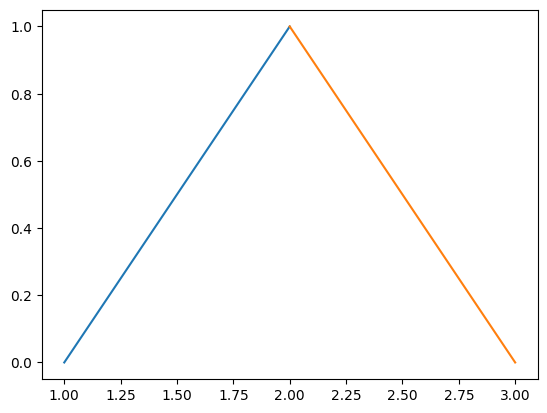

In [7]:
#INTERVAL NUMBERS
f = TFN(1, 2, 3)
g = TFN(0, 1, 2)
N = 10000
h = 1/N
L = []
for i in range(N+1):
    alpha = i*h
    x1 = f.alphaCut(alpha)
    L.append([x1.lowLim, x1.upLim, alpha])
plt.plot([i[0] for i in L], [i[2] for i in L])
plt.plot([i[1] for i in L], [i[2] for i in L])
plt.show()
 

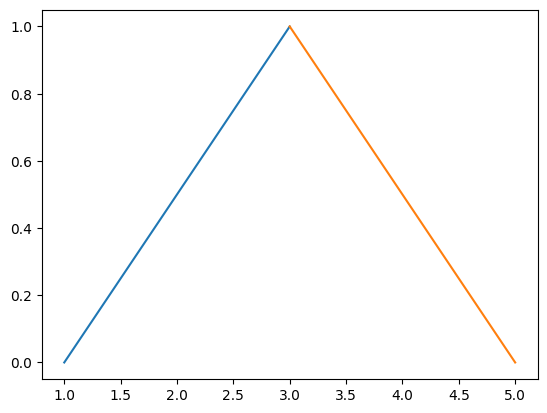

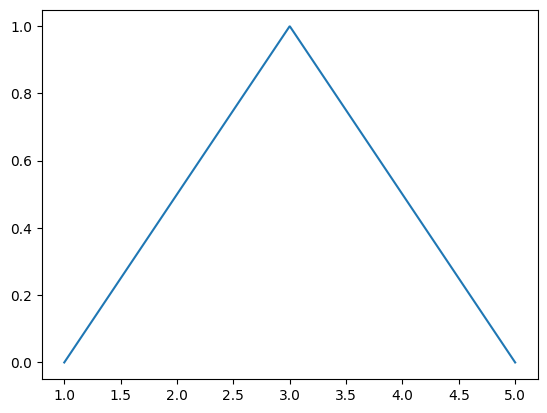

In [8]:
L = []
for i in range(N+1):
    alpha = i*h
    x1 = f.alphaCut(alpha)
    x2 = g.alphaCut(alpha)
    z = x1+x2
    L.append([z.lowLim, z.upLim, alpha])
plt.plot([i[0] for i in L], [i[2] for i in L])
plt.plot([i[1] for i in L], [i[2] for i in L])
plt.show()
s = f + g
fig = s.plot(deev=False)
plt.show()

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'TFN'

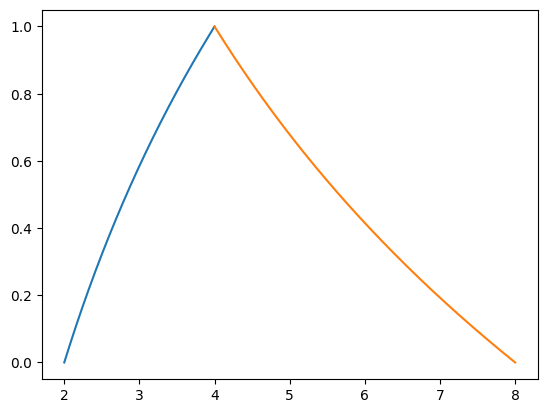

In [9]:
L = []
for i in range(N+1):
    alpha = i*h
    x1 = f.alphaCut(alpha)
    z = 2**x1
    L.append([z.lowLim, z.upLim, alpha])
plt.plot([i[0] for i in L], [i[2] for i in L])
plt.plot([i[1] for i in L], [i[2] for i in L])
(2**f).plot()
plt.show()